# Laboration 2 Maskininlärning 
## Förberedelser - Exploratary Data Analysis

### Importering av alla nödvändiga bibliotek:
pandas: för att jobba med tabeller och data på ett smidigt sätt.

matplotlib: för att rita upp diagram och grafer.

seaborn: för att göra snyggare och mer avancerade diagram.

scipy.sparse: för att hantera stora matriser med mest nollor, så det tar mindre plats.

sklearn.neighbors: för att använda KNN, en modell som hittar de närmaste grannarna.

fuzzywuzzy: för att jämföra texter och hitta rätt filmtitel även om man stavar fel.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

c:\Users\leven\Desktop\Maskininlärning\levent-Machine-learning-AI24\.venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Inläsning av dataset från CSV-filer.

In [3]:
movies_df = pd.read_csv("movies.csv")
ratings_df = pd.read_csv("ratings.csv") 


### Säkerställning att datan har laddats korrekt

In [4]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119


### Skapar funktionen som ska returnera titel på filmen via dataframe och id

In [6]:
def movie_name(id):
    return movies_df.query("movieId == @id")["title"].item()

In [7]:
movie_name(19)

'Ace Ventura: When Nature Calls (1995)'

### Undersökning av vilka filmer som har fått högst ratings.
Skapar en variabel med de 10 filmer som har fått flest betyg.

In [8]:
top10_most_rated = ratings_df["movieId"].value_counts()[:10]
top10_most_rated

movieId
318     122296
356     113581
296     108756
2571    107056
593     101802
260      97202
2959     86207
527      84232
480      83026
1196     80200
Name: count, dtype: int64

### 

In [ ]:
# Tom listan som ska spara filmtitlarna
top10_most_rated_titles = []
for movie_id in top10_most_rated.index:
    top10_most_rated_titles.insert(0, movie_name(movie_id))

### Kontrollerar att top 10 filmer som är betygsatta har sparats med titel

In [10]:
top10_most_rated_titles

['Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Jurassic Park (1993)',
 "Schindler's List (1993)",
 'Fight Club (1999)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Silence of the Lambs, The (1991)',
 'Matrix, The (1999)',
 'Pulp Fiction (1994)',
 'Forrest Gump (1994)',
 'Shawshank Redemption, The (1994)']

### Skapar ett barplot som visar hur många betygsättning är på top 10 filmerna.

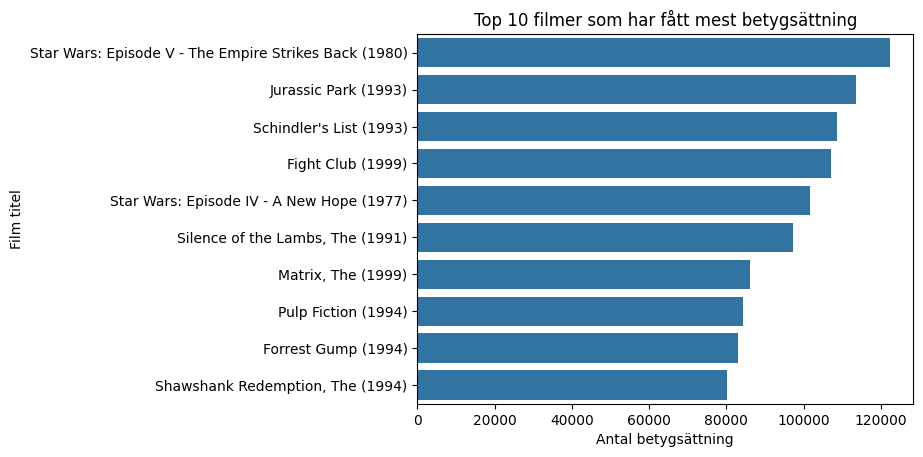

In [11]:
ax = sns.barplot(x=top10_most_rated, y=top10_most_rated_titles)
ax.set(xlabel="Antal betygsättning", ylabel="Film titel", title="Top 10 filmer som har fått mest betygsättning")
plt.show()

### Skapar medel på betygsättning poäng av de top 10 mest betygsatta filmer

In [12]:
top10_most_rated_mean = ratings_df[ratings_df["movieId"].isin(top10_most_rated.index)]["rating"].mean()
print(f"Medelvärde på top 10 betygsatta filmer: {top10_most_rated_mean:.1f} av 5")

Medelvärde på top 10 betygsatta filmer: 4.1 av 5


### Skapar ny kolumn i movies dataframe som heter "year" med endast årtal

In [ ]:
movies_df["year"] = movies_df["title"].str[-5:-1]

# Kontrollerar att det funkar som det ska
movies_df.tail()

,movieId,title,genres,year
86532,288967,State of Siege: Temple Attack (2021),Action|Drama,2021
86533,288971,Ouija Japan (2021),Action|Horror,2021
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary,1973
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller,2023
86536,288983,UNZIPPED: An Autopsy of American Inequality (2...,Documentary,2021


### Skapar barplot som visar hur många filmer som släpptes under specifik år väljs top 10 filmer med mest utsläppning. 

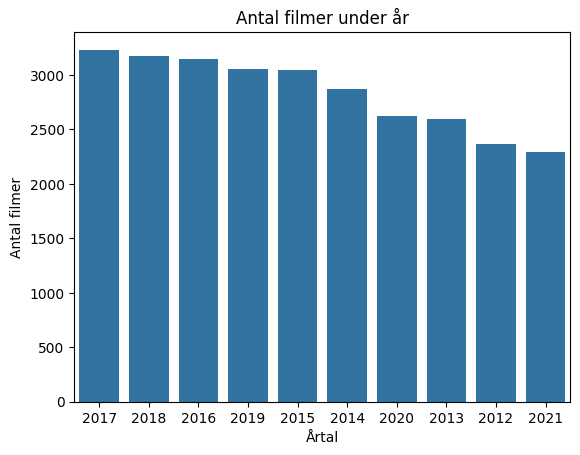

In [14]:
top10_movies_released_year = movies_df["year"].value_counts()[:10]

ax = sns.barplot(y = top10_movies_released_year, x = top10_movies_released_year.index)
ax.set(xlabel = "Årtal", ylabel = "Antal filmer", title = "Antal filmer under år")
plt.show()

## Utförande - Skapelse av sparse matrix

### Ser hur många rader ratings_df har

In [15]:
number_of_ratings = ratings_df.shape[0]
number_of_ratings

33832162

### Ser hur många olika filmer finns det i ratings_df

In [16]:
number_of_movies = ratings_df["movieId"].nunique()
number_of_movies

83239

In [17]:
print(f"Det finns totalt {number_of_ratings:,} betygsättningar för {number_of_movies:,} filmer".replace(",", " "))

Det finns totalt 33 832 162 betygsättningar för 83 239 filmer


### Uträkning av hur ofta varje movieID förekommer dess hur många betygsättning den har fått.

In [18]:
rating_counts = ratings_df["movieId"].value_counts()
rating_counts

movieId
318       122296
356       113581
296       108756
2571      107056
593       101802
           ...  
212773         1
194901         1
194572         1
194002         1
193301         1
Name: count, Length: 83239, dtype: int64

### Skapar en series med filmer som har mindre än 10000 betygsättning samt series och dataframe med 10000 eller mer betygsättning

In [19]:
less_than_10000_ratings = rating_counts[rating_counts < 10000]
movies10000_or_more_ratings = rating_counts[rating_counts >= 10000]
movies_10000_or_more_ratings = ratings_df[ratings_df["movieId"].isin(movies10000_or_more_ratings.index)]

In [20]:
less_than_10000_ratings

movieId
1321      9996
2087      9993
72226     9990
1272      9974
116823    9958
          ... 
212773       1
194901       1
194572       1
194002       1
193301       1
Name: count, Length: 82399, dtype: int64

In [21]:
movies10000_or_more_ratings

movieId
318      122296
356      113581
296      108756
2571     107056
593      101802
          ...  
3072      10035
1513      10027
7090      10024
1042      10023
55765     10008
Name: count, Length: 840, dtype: int64

In [22]:
movies_10000_or_more_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119
...,...,...,...,...
33832144,330975,6711,2.5,1091583650
33832149,330975,6874,4.0,1091684274
33832155,330975,7153,4.0,1091582733
33832159,330975,8622,4.0,1091581777


In [23]:
less_than_10000_ratings.sum()

np.int64(15148089)

In [24]:
print(f"Procent av borträknad data efter filteringen: {less_than_10000_ratings.sum() / number_of_ratings * 100:.1f}%")

Procent av borträknad data efter filteringen: 44.8%


In [25]:
print(f"Procent av data kvar efter filteringen: {len(movies_10000_or_more_ratings) / number_of_ratings * 100:.1f}%")

Procent av data kvar efter filteringen: 55.2%


In [26]:
print(f"Procent of fimer med mindre än 10000 betygsättningar {len(less_than_10000_ratings)/number_of_movies * 100:.1f}%")

Procent of fimer med mindre än 10000 betygsättningar 99.0%


### Det finns 82 399 filmer som har under 10 000 betygsättningar med totalt 15 148 089 betygsättningar. Det motsvarar 99% av filmer dock endast 44.8% av datasetet som ska inte inkluderas.
- Utan de det kommer finnas fortfarande 55.2% av data kvar vilket innebär alltså 18 684 073 betygsättningar kvar.

### Nu när vi har kvar 55,2 % av all data, som representerar ungefär 1 % av de mest populära filmerna, är det dags att skapa en gles (sparse) matris.
Först behöver vi göra om datan så att varje rad motsvarar en film, varje kolumn en användare, och cellerna innehåller användarens betyg. Saknas ett betyg, fylls det med 0.
Anledningen till att det bara blir cirka 1 % av filmerna är enkel – de flesta har fullt upp i livet och prioriterar att se just de populäraste filmerna när de får tid att koppla av

In [27]:
movie_users_request = movies_10000_or_more_ratings.pivot(index="movieId", columns="userId", values="rating").fillna(0)


- Skapar en sparse matrix av pivot tabellen för att kunna spara minne och effektivisera KNN-beräkningar

In [28]:
movie_users_request_matrix = csr_matrix(movie_users_request.values)
movie_users_request_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 18684073 stored elements and shape (840, 323357)>

### Nu är det dags att bygga ett rekommendationssystem med KNN.
Först gör vi en filtrerad lista med de filmer som är kvar efter att vi sorterat bort de mindre populära.

In [29]:
movies_in_recommendations = movies_df[movies_df["movieId"].isin(movies_10000_or_more_ratings["movieId"].unique())].reset_index()
movies_in_recommendations

,index,movieId,title,genres,year
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,5,Father of the Bride Part II (1995),Comedy,1995
4,5,6,Heat (1995),Action|Crime|Thriller,1995
...,...,...,...,...,...
835,54254,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,2018
836,57778,195159,Spider-Man: Into the Spider-Verse (2018),Action|Adventure|Animation|Sci-Fi,2018
837,61176,202439,Parasite (2019),Comedy|Drama,2019
838,62208,204698,Joker (2019),Crime|Drama|Thriller,2019


### Nu tränas KNN-modellen på den glesa matrisen.

Antalet grannar (n_neighbors) sätts till 20 för att kunna hitta de 20 mest liknande filmerna.

Vi använder "cosine" som mått för att fånga hur lika betygsmönstren är.

Algoritmen sätts till "brute", vilket innebär att den jämför varje film med alla andra för att få bästa möjliga matchning.

In [30]:
model_KNN = NearestNeighbors(n_neighbors = 20, metric = "cosine", algorithm = "brute")
model_KNN.fit(movie_users_request_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

### Nu anropas funktionen som låter användaren skriva in en filmtitel.
Då visas 5 liknande filmer som rekommendation baserat på den titeln.

### Funktionen låter användaren skriva in en filmtitel eller tagg för att få rekommendationer.
Den använder information från dataframes med rekommenderbara filmer, taggar, filmtitlar, KNN-modellen och den glesa matrisen.
Med hjälp av fuzzywuzzy hittar vi de 6 närmaste matchningarna – en extra eftersom den inmatade filmen själv är med.
Sedan skrivs de 5 mest liknande filmerna ut som rekommendation.

In [ ]:

def movie_recommendations():
    try: 
        # Ber användaren att skriva en filmtitel eller en tagg
        user_input = input("Skriv in film titel, (Måste vara exakt samma titel): ")

        # process.extractOne används för att hitta bästa matchning i filmtitlarna i rekommendationsdatabasen
        # score_cutoff sätts till 90, vilket innebär att endast matchningar med poäng över 90 (av 100) beaktas.
        match = process.extractOne(user_input, movies_in_recommendations["title"], score_cutoff=90)
            
        # Om ingen matchning finns (t.ex. poängen är under 90) returneras None. 
        # Om matchning lyckas returneras en tuple med matchad titel, poäng och index i databasen.
        index = match[2]
        
        # Hämtar de 6 närmaste grannarna baserat på användarens valda film. 
        # kneighbors returnerar både avstånd och index, men vi är intresserade av indexen.
        _ , indices = model_KNN.kneighbors(movie_users_request_matrix[index], n_neighbors = 6)

        # Skriver ut filmtiteln för den film som användaren gav som input. [0][0] hämtar första grannens index.
        print(f"Top 5 rekommendationer för: {movies_in_recommendations['title'].iloc[indices[0][0]]}")
        
        # Loopa genom de resterande 5 närmaste grannarna och skriv ut deras filmtitlar som rekommendationer.
        for neighbor_index in indices[0][1:]:
            print(movies_in_recommendations["title"].iloc[neighbor_index])
    
    except (TypeError, IndexError):
                # Om ett fel inträffar (t.ex. om filmen inte finns i databasen), visa ett felmeddelande.
                print(f"Beklagar! Kan inte hitta titel för '{user_input}' i databasen.")
                return

  

In [34]:
movie_recommendations()

Top 5 rekommendationer för: Toy Story (1995)
Toy Story 2 (1999)
Star Wars: Episode IV - A New Hope (1977)
Independence Day (a.k.a. ID4) (1996)
Back to the Future (1985)
Jurassic Park (1993)


Rekommendationssystemet använder K-Nearest Neighbors (KNN) för att hitta filmer som liknar varandra baserat på hur användare har betygsatt dem.
Detta bygger på en metod som kallas collaborative filtering. Den utgår från att om flera användare har satt liknande betyg på samma filmer, så har de troligen liknande smak. Därför kan man ge rekommendationer utifrån vad andra med liknande smak har gillat.

Den här typen av algoritm fungerar bra för användare som har satt många betyg, eller när det gäller filmer som har fått väldigt många betyg. Däremot fungerar det sämre för nya användare eller filmer som inte har så mycket data än – det problemet kallas ibland för "cold start".

En annan metod är content-based filtering, som istället fokuserar på filmens egenskaper – till exempel genre, skådespelare och teman.
Här lär sig systemet vad just du gillar, baserat på dina tidigare val och interaktioner.
Eftersom det bygger på innehållet, kan även nya användare få ganska bra rekommendationer, särskilt om systemet har tillgång till viss information som t.ex. ålder eller kön.